<a href="https://colab.research.google.com/github/Abonia1/Deep-learning/blob/main/TrOCR_Handwritten_text_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Study handwritten date detection with tranfer learning

In this notebook, we will be using a pre-trained image Transformer and text Transformer models, namely TrOCR, which leverages the Transformer architecture for both image understanding and wordpiece-level text generation. The TrOCR model is simple but effective, and can be pre-trained with large-scale synthetic data and fine-tuned with human-labeled datasets. Experiments show that the TrOCR model outperforms the current state-of-the-art models on both printed and handwritten text recognition tasks.

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 23.6 MB/s 
     |████████████████████████████████| 6.6 MB 51.4 MB/s 
     |████████████████████████████████| 101 kB 9.3 MB/s 
     |████████████████████████████████| 596 kB 55.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [12]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import IPython.display
import requests

In [6]:
def apply_trocr(image):
  processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
  model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
  pixel_values = processor(images=image, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_ids, generated_text

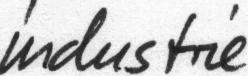

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Predicted text: indus the


In [15]:
# load image from the IAM database
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

# display image
display(image)

# Print generated id and text
generated_ids, generated_text = apply_trocr(image)
print("Predicted text:",generated_text)

In [10]:
generated_text

'indus the'

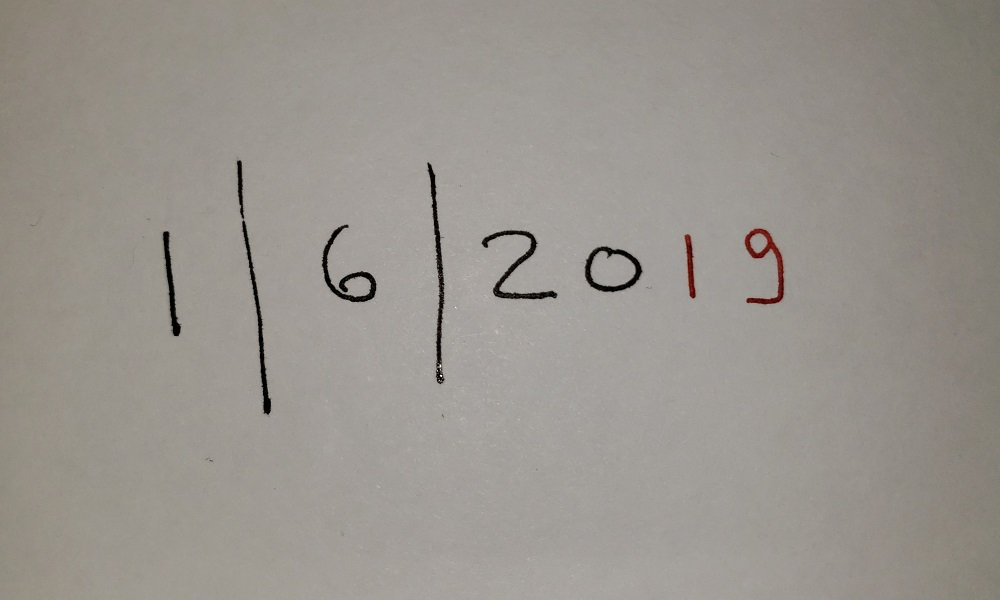

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Predicted text: il alzois.


In [13]:
# load image from the IAM database
url = 'https://josephsteinberg.com/wp-content/uploads/2020/01/DateFraud.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

#display image
display(image)

generated_ids, generated_text = apply_trocr(image)
print("Predicted text:",generated_text)

In [14]:
generated_text

'il alzois.'

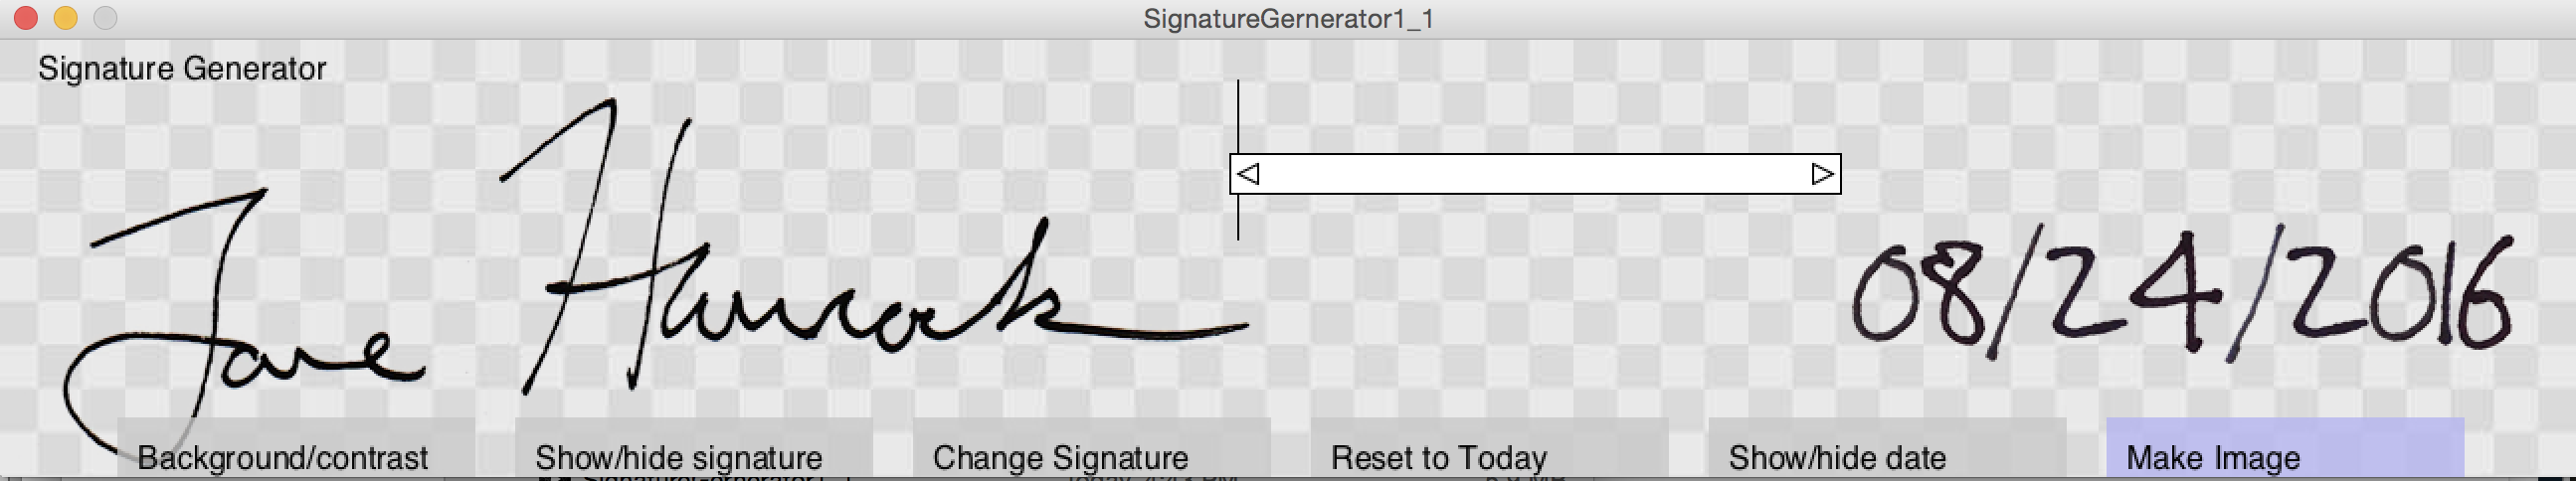

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Predicted text: Jane Hancock " 08124212016


In [16]:
# load image from the IAM database
url = 'https://www.joemckaystudio.com/images/sig1.png'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

#display image
display(image)

generated_ids, generated_text = apply_trocr(image)
print("Predicted text:",generated_text)

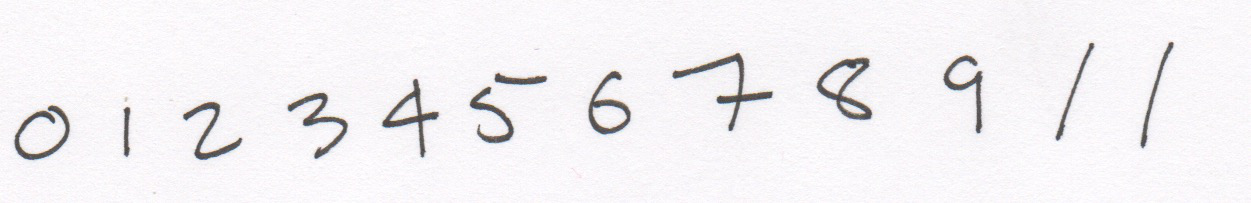

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Predicted text: 0 12 34567891 1


In [17]:
# load image from the IAM database
url = 'https://www.joemckaystudio.com/images/numbers.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

#display image
display(image)

generated_ids, generated_text = apply_trocr(image)
print("Predicted text:",generated_text)